# Bike Sharing 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

from datetime import datetime

%matplotlib inline

### Import data

In [96]:
#import data

station_df = pd.read_csv('data/station.csv')
trip_df = pd.read_csv('data/trip.csv')
weather_df = pd.read_csv('data/weather.csv')

### Examine station data

In [26]:
station_df.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [27]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
id                   70 non-null int64
name                 70 non-null object
lat                  70 non-null float64
long                 70 non-null float64
dock_count           70 non-null int64
city                 70 non-null object
installation_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 3.9+ KB


In [29]:
#look for missing data; should be zero as info summary above gives 70 entries for each column
station_df.isnull().sum()

id                   0
name                 0
lat                  0
long                 0
dock_count           0
city                 0
installation_date    0
dtype: int64

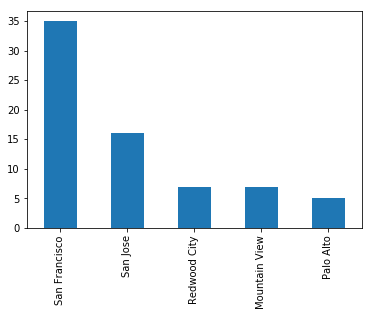

In [109]:
#stations by city
station_df.city.value_counts().plot(kind='bar')

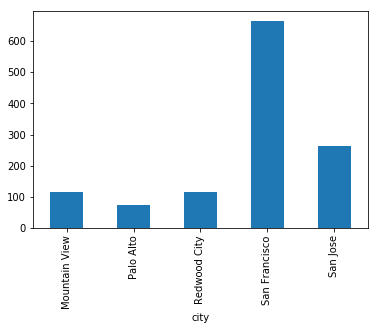

In [111]:
#number of docks per city
station_df.groupby('city')['dock_count'].sum().plot(kind='bar')

### Narrow focus to SF

In [90]:
# Narrow focus to SF
sf_stations = station_df[station_df.city == 'San Francisco']
sf_stations.head()

,id,name,lat,long,dock_count,city,installation_date
32,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,8/19/2013
33,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,8/19/2013
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,8/19/2013
35,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,8/19/2013
36,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,8/19/2013


In [88]:
sf_stations.dock_count.sum()

665

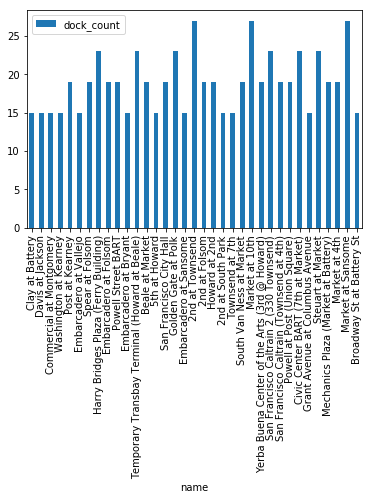

In [120]:
#number of docks per sf station
sf_stations.plot(kind='bar', x='name', y='dock_count')



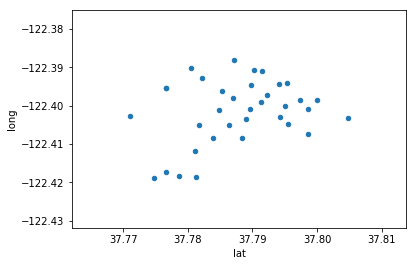

In [92]:
#How spread out are the stations?
sf_stations.plot(kind='scatter', x='lat', y='long')

### Examine trip data

In [97]:
trip_df.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [98]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669959 entries, 0 to 669958
Data columns (total 11 columns):
id                    669959 non-null int64
duration              669959 non-null int64
start_date            669959 non-null object
start_station_name    669959 non-null object
start_station_id      669959 non-null int64
end_date              669959 non-null object
end_station_name      669959 non-null object
end_station_id        669959 non-null int64
bike_id               669959 non-null int64
subscription_type     669959 non-null object
zip_code              663340 non-null object
dtypes: int64(5), object(6)
memory usage: 56.2+ MB


In [99]:
trip_df.describe()

,id,duration,start_station_id,end_station_id,bike_id
count,669959.000000,6.699590e+05,669959.000000,669959.000000,669959.000000
mean,460382.009899,1.107950e+03,57.851876,57.837438,427.587620
std,264584.458487,2.225544e+04,17.112474,17.200142,153.450988
min,4069.000000,6.000000e+01,2.000000,2.000000,9.000000
25%,231082.500000,3.440000e+02,50.000000,50.000000,334.000000
50%,459274.000000,5.170000e+02,62.000000,62.000000,440.000000
75%,692601.000000,7.550000e+02,70.000000,70.000000,546.000000
max,913460.000000,1.727040e+07,84.000000,84.000000,878.000000


In [ ]:
################################################################################
# trips in SF only
#trip_df[trip_df.].end_station_name.value_counts()

#sf_trips = trip_df[trip_df.start_station_id]    sf_stations.id

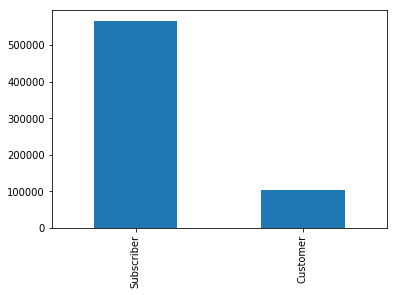

In [124]:
##subscription type
trip_df.subscription_type.value_counts().plot(kind='bar')

In [ ]:
####weekday vs weekend trips

In [ ]:
####weekday vs weekend trips sub vs cust

In [72]:
#Convert to datetime so that it can be manipulated more easily
trip_df.start_date = pd.to_datetime(trip_df.start_date, format='%m/%d/%Y %H:%M')
trip_df.end_date = pd.to_datetime(trip_df.end_date, format='%m/%d/%Y %H:%M')

In [100]:
#duration is time of trip in seconds; convert to minutes
trip_df.duration = trip_df.duration / 60
trip_df.duration.describe()

count    669959.000000
mean         18.465831
std         370.923950
min           1.000000
25%           5.733333
50%           8.616667
75%          12.583333
max      287840.000000
Name: duration, dtype: float64

In [ ]:
#############################################
#Remove outliers
#################

In [40]:
trip_df.end_station_name.value_counts()

San Francisco Caltrain (Townsend at 4th)         63179
San Francisco Caltrain 2 (330 Townsend)          35117
Harry Bridges Plaza (Ferry Building)             33193
Embarcadero at Sansome                           30796
2nd at Townsend                                  28529
Market at Sansome                                28033
Townsend at 7th                                  26637
Steuart at Market                                25025
Temporary Transbay Terminal (Howard at Beale)    23080
Market at 4th                                    19915
Powell Street BART                               19898
Market at 10th                                   17864
2nd at South Park                                16843
5th at Howard                                    14849
Civic Center BART (7th at Market)                14339
Howard at 2nd                                    14009
Embarcadero at Folsom                            13532
Embarcadero at Bryant                            13144
Embarcader

In [35]:
weather_df.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [36]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 24 columns):
date                              3665 non-null object
max_temperature_f                 3661 non-null float64
mean_temperature_f                3661 non-null float64
min_temperature_f                 3661 non-null float64
max_dew_point_f                   3611 non-null float64
mean_dew_point_f                  3611 non-null float64
min_dew_point_f                   3611 non-null float64
max_humidity                      3611 non-null float64
mean_humidity                     3611 non-null float64
min_humidity                      3611 non-null float64
max_sea_level_pressure_inches     3664 non-null float64
mean_sea_level_pressure_inches    3664 non-null float64
min_sea_level_pressure_inches     3664 non-null float64
max_visibility_miles              3652 non-null float64
mean_visibility_miles             3652 non-null float64
min_visibility_miles              3652 non-null float6

In [37]:
weather_df.isnull().sum()

date                                 0
max_temperature_f                    4
mean_temperature_f                   4
min_temperature_f                    4
max_dew_point_f                     54
mean_dew_point_f                    54
min_dew_point_f                     54
max_humidity                        54
mean_humidity                       54
min_humidity                        54
max_sea_level_pressure_inches        1
mean_sea_level_pressure_inches       1
min_sea_level_pressure_inches        1
max_visibility_miles                13
mean_visibility_miles               13
min_visibility_miles                13
max_wind_Speed_mph                   1
mean_wind_speed_mph                  1
max_gust_speed_mph                 899
precipitation_inches                 1
cloud_cover                          1
events                            3143
wind_dir_degrees                     1
zip_code                             0
dtype: int64

In [39]:
weather_df.describe()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code
count,3661.000000,3661.000000,3661.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3611.000000,3664.000000,...,3664.000000,3652.000000,3652.000000,3652.000000,3664.000000,3664.000000,2766.000000,3664.000000,3664.000000,3665.000000
mean,70.580989,61.348812,51.947282,53.149820,48.794794,44.306840,85.446968,67.256993,46.458045,30.074997,...,29.965835,10.555312,9.822015,8.229737,16.398472,5.962063,22.299349,2.784389,266.605895,94325.000000
std,8.385572,7.234397,7.441444,6.885449,7.822281,9.355432,9.226972,10.945591,14.434784,0.134492,...,0.133476,2.193828,1.469894,2.862132,7.787588,3.340603,9.618813,2.276401,102.047645,404.615212
min,44.000000,38.000000,25.000000,20.000000,13.000000,2.000000,24.000000,24.000000,4.000000,29.500000,...,28.980000,5.000000,4.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,94041.000000
25%,64.000000,56.000000,47.000000,49.000000,44.000000,39.000000,82.000000,62.000000,37.000000,29.980000,...,29.880000,10.000000,10.000000,7.000000,13.000000,3.000000,17.000000,1.000000,254.000000,94063.000000
50%,70.000000,61.000000,53.000000,54.000000,49.000000,46.000000,86.000000,68.000000,48.000000,30.060000,...,29.950000,10.000000,10.000000,10.000000,16.000000,6.000000,22.000000,3.000000,297.000000,94107.000000
75%,77.000000,67.000000,58.000000,58.000000,55.000000,52.000000,93.000000,74.000000,56.000000,30.170000,...,30.050000,10.000000,10.000000,10.000000,20.000000,8.000000,25.000000,5.000000,330.000000,94301.000000
max,102.000000,84.000000,75.000000,68.000000,65.000000,63.000000,100.000000,96.000000,93.000000,30.650000,...,30.370000,20.000000,20.000000,20.000000,128.000000,23.000000,114.000000,8.000000,2772.000000,95113.000000
